# Assessment 1: Regression Analysis 







# 1. Stage One - Determine Business Objectives and Assess the Situation  <a class="anchor"></a>
In the modern wine industry, the quality of the product is the paramount factor which determines the success in the market and brand reputation. The existing quality certification practices rely on the application of physicochemical tests and supplemented by sensory tests that are carried out by human experts (Nebot et al., 2015). This traditional approach creates a significant business problem as it fully relies on subjective human taste and the process is also expensive. Moreover, these tests occur at the end of the production cycle when a huge portion of time and money have already been invested. This late quality assessment makes the discovery of a poor-quality batch particularly costly  as the entire production process may need to be repeated. <br>

This project directly addresses the inefficiency and financial risk of this reactive quality control model. The objective of the project is to design a predictive analytics model based on the machine learning (ML) techniques using the well-known <a href="https://archive.ics.uci.edu/dataset/186/wine+quality">Wine Quality</a> dataset from the UCI Machine Learning Repository to estimate the quality of wine(ranging from 0 to 10) based on its objective physicochemical characteristics. Such a model will help solve the business problem by transforming quality assessment from a subjective, lagging indicator into an objective, data-driven decision support system. Consequently, winemakers could easily keep track and control quality trends during the production time, referring to the model findings in order to make timely modifications, improving the end product and minimizing the risk of creating low-quality batches (Nebot et al., 2015).

## 1.1 Success Criteria
Technical effectiveness of the project is measured by three main criteria which correlate modeling results with a real business value.
* **Benchmark Predictive Accuracy**: Several predictive models will be developed using different ML algorithms and a model will be eleceted as champion model that achieves a Mean Squared Error (MSE) of less than 0.40. This performance is required to represent around 10% accuracy improvement over a standard linear regression baseline model.
* **Actionable Feature Extraction**: The project will have to determine and prioritize the key physicochemical determinants of wine quality, such as alcohol levels, acidity, and sulphates. This analytical insights gives winemakers the intelligence needed to maximise production by making targeted decisions.
* **Robust Multi-Metric Validation**: Model superiority will be confirmed through robust validation using two key metrics. Performance will be measured using Mean Squared Error(MSE) in order to make it easy to interpret business. Besides, the Coefficient of Determination (R-squared) will be utilized to confirm the ability of the model to explain variance in quality scores.


## 1.2 Assess the Current Situation<a class="anchor"></a>

List the resources available to the project including:

* **Personnel**: The project will be conducted by Md. Arifuzzaman Munaf, a postgraduate student specializing in Artificial Intelligence. Responsibilities include data acquisition, exploratory analysis, model building, evaluation, and reporting. The project will also draw on open research, such as the original UCI dataset documentation and published academic analyses on wine quality prediction using machine learning.
* **Data**: The dataset comes from the UCI Machine Learning Repository and comprises two files: <br>
	*	**winequality-red.csv** – 1,599 samples of red wine
	*	**winequality-white.csv** – 4,898 samples of white wine<br>

    Both datasets contain 11 physicochemical input variables and one target variable. The data is clean and well-structured, with no missing values, and has    been widely used in literature for regression and classification experiments (Cortez et al., 2009).


* **Computing resources**: The project will primarily use Google Colab, a cloud-based Jupyter notebook platform with access to:
	*	≈12.5 GB RAM and up to 2 vCPUs
	*	Optional GPU/TPU acceleration if needed
	*	Google Drive integration for version control

    If necessary, a local device with 16 GB RAM and M3 processor 8-core CPU can be used for smaller tests or debugging.
* **Software**: The project will use Python 3.11.13 in the Colab environment. The following packages will support the machine learning workflow:
	*	pandas, numpy: data handling and numerical operations
	*	matplotlib, seaborn: visualization and exploratory data analysis
	*	scikit-learn: regression models, evaluation, and pipeline design
	*	xgboost, lightgbm: gradient boosting models for improved performance

    The project will also use GitHub for version control and Google Scholar for referencing relevant academic papers.


# 2. Stage  Two - Data Understanding <a class="anchor"></a>
The dataset used for this project is the Wine Quality Dataset, publicly available from the UCI Machine Learning Repository:
https://archive.ics.uci.edu/dataset/186/wine+quality

The dataset includes measurements of the physicochemical and sensory quality of two varieties of Portuguese wine (Vinho Verde) red wine (1,599 samples) and white wine (4,898 samples). The samples are coded with 11 numerical inputs based on physicochemical tests, and a single class variable of a quality score of 0 to 10, set by trained sensory assessors.

The features include metrics such as:
* Fixed acidity
* Volatile acidity
* Citric acid
* Residual sugar
* Chlorides
* Free sulfur dioxide
* Total sulfur dioxide
* Density
* pH
* Sulphates
* Alcohol

The dataset has no missing values, and is formatted as two CSV files: winequality-red.csv and winequality-white.csv. Each file has the same schema, allowing for independent modeling or unified analysis with wine type as an added categorical feature.

This dataset was first published by Cortez et al. (2009) in which they used it to compare a range of machine-learning algorithms in predicting wine preferences. Due to its very large feature set and realistic application, the dataset has become a typical point of reference in studies of regression, classification, and feature selection tasks.

## 2.1 Initial Data Acquisition <a class="anchor"></a>
The dataset was originally downloaded via the UCI Machine Learning Repository and rehosted on a personal GitHub repository to allow easier and consistent data access during the development process. This will ensure that there is no need to upload dataset files repeatedly to Google Colab and hence facilitate reproducible workflow integration.

Two files were in the form of a comma-separated value (CSV) format with each file comprising physicochemical properties and quality ratings of red and white wine, respectively. For this project, the winequality-red.csv was used.

The datasets are hosted at:
* **Red wine**: https://github.com/Arifuzzaman-Munaf/dataset/blob/main/winequality-red.csv
* **White wine**: https://github.com/Arifuzzaman-Munaf/dataset/blob/main/winequality-white.csv

In [1475]:
# Import Libraries Required
!pip3 -q install pandas matplotlib numpy seaborn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [1476]:
!pip3 -q install wget   # install wget in quiet mode

!mkdir -p dataset # create a directory to store the dataset files

# download the files from the URL to the dataset directory
!wget -q -O dataset/winequality-red.csv "https://raw.githubusercontent.com/Arifuzzaman-Munaf/dataset/main/winequality-red.csv"

In [1477]:
# Read the red and white wine datasets from CSV files, using semicolon as separator
df = pd.read_csv('dataset/winequality-red.csv', sep=';')

## 2.2 Describe Data <a class="anchor"></a>

In [1478]:
#df.columns, df.shape, df.dtypes, df.describe(), df.info() and df.head(10) Use Pandas to explore and clean up your tabular data 
print(f"The columns in the dataset are:\n{df.columns}\n")
print(f"The shape of the dataset is: {df.shape}\n")
print(f"The data types of the columns are:\n{df.dtypes}\n")

The columns in the dataset are:
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

The shape of the dataset is: (1599, 12)

The data types of the columns are:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object



It is clearly visible that the dataset has 1599 entries. All the colums except `quality` contain floating numbers as expected. `quality` represents the target containing an integer in [3,10] interval.

In [1479]:
df.describe().T

count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                           50%        75%        max  
fixed acidity          7.90000   9.200000   15.90000  
volatile acidity       0.52000   0.640000    1.58000  
citric acid            0.26000   0.420000    1.00000  
residual sugar         2.20000   2.600000   15.50000  
chlorides              0.07900   0.090000    0.61100  
free sulfur dioxide   14.00000  21.000000   72.00000  
total sulfur dioxide  38.00000  62.000000  289.00000  
density                0.99675   0.997835    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    2.00000  
alcohol               10.20000  11.100000   14.90000  
quality                6.00000   6.000000    8.00000

In [1480]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [1481]:
df.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

## 2.3 Verify Data Quality <a class="anchor"></a>

* The dataset is structurally complete, comprising 1599 instances and 12 attributes (11 predictor variables and 1 dataset identity variable) that was confirmed in 2.2 Described Data section. It includes all features required for predictive modelling of wine quality and covers red wine samples.
* Most features in the dataset represent physical or chemical measurements (e.g., acidity, sugar, alcohol) that cannot be negative in real-world scenarios. Values like pH, sulfur dioxide(SO<sub>2</sub>), and alcohol content are based on standard measuring units, where negative quantities are scientifically invalid. If negative values appear, they likely indicate data entry errors or corruption and should be investigated or removed. Fortunately, the verification step confirmed the validity of the dataset as there was not negative entry present in the numerical features of the dataset
* According to the original source (Cortez et al., 2009), the dataset contains no missing values. In adherence to standard data preprocessing protocols, a programmatic verification was conducted to confirm this assertion.
* A check for data quality also includes searching for duplicate records, as they can bias the analysis. The verification found 1,177 duplicate rows in the dataset. These duplicates were removed and verified properly.


In [1482]:
# track the features with negative values
features = df.columns[0:-1]
neg_features = []
for feature in features:  # Iterate through all columns except last one(quality)
    if (df[feature] < 0).any():   # Check if any values are negative
        neg_features.append(feature)

if neg_features:
    print(f"The features with negative values are: {neg_features}")
else:
    print("No negative values found in the dataset.")

No negative values found in the dataset.


In [1483]:
# check for missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [1484]:
def get_duplicates(df):
    # return the number of duplicate entries
    return df.duplicated()

def remove_duplicates(df):
    # Remove duplicate rows
    df = df.drop_duplicates()
    print(f"Number of duplicate entries after removal: {df.duplicated().sum()}")
    print(f"shape of the dataset after removing duplicate entries: {df.shape}")

    return df


In [1485]:
# initial entries of the dataset
initial_entries = df.shape[0]

duplicates = get_duplicates(df)
print(f"Number of duplicate entries: {duplicates.sum()}")

# Show first 2 duplicate rows with index
print(f"Example of duplicate rows:\n{df[df.duplicated(keep=False)].head(2).T}\n")

df = remove_duplicates(df)

# check if the number of entries is same as the initial entries
assert df.shape[0] == initial_entries - duplicates.sum(), "Duplicate entries are not removed"

Number of duplicate entries: 240
Example of duplicate rows:
                            0        4
fixed acidity          7.4000   7.4000
volatile acidity       0.7000   0.7000
citric acid            0.0000   0.0000
residual sugar         1.9000   1.9000
chlorides              0.0760   0.0760
free sulfur dioxide   11.0000  11.0000
total sulfur dioxide  34.0000  34.0000
density                0.9978   0.9978
pH                     3.5100   3.5100
sulphates              0.5600   0.5600
alcohol                9.4000   9.4000
quality                5.0000   5.0000

Number of duplicate entries after removal: 0
shape of the dataset after removing duplicate entries: (1359, 12)


### 2.3.1. Outliers <a class="anchor"></a>
At this point, we may also want to remove any outliers. These can be due to typos in data entry, mistakes in units, or they could be legitimate but extreme values or rare events. To identify outliers, the whole process was divided into several step-
1. Initially, the lower inner and upper inner fences were calculated following the strategies mentioned by National Institute of
Standards and Technology(n.d).
To identify values that lie far in the tails of a distribution, four “fence” thresholds are defined in terms of the interquartile range (IQR):
   *   Lower inner fence = Q1 − 1.5 × IQR
   *   Upper inner fence = Q3 + 1.5 × IQR
   *   Lower outer fence = Q1 − 3 × IQR
   *   Upper outer fence = Q3 + 3 × IQR


   Any observation falling outside an inner fence is classified as a "mild" outlier, whereas points beyond the outer fences are deemed "extreme" outliers. So 
   all the mild outliers are ident


2. Secondly, a histogram with an overlaid box plot was plotted for each feature for visualize the outliers that simultaneously depict central tendency, dispersion, and frequency distribution. Vertical lines indicating the inner fences were added to the histogram, enhancing interpretability of extreme values.
3. Finally, several outliers were identified across all features and only those data points appearing as outliers in more than two features were retained. This conservative filtering approach improves reliability by reducing false positives due to natural feature variance.





In [1486]:
def compute_fences(df, feature):
    Q1 = np.percentile(df[feature], 25)  # 1st quartile
    Q3 = np.percentile(df[feature], 75)  # 3rd quartile
    IQR = Q3 - Q1  # calculate IQR
    lower_inner_fence = Q1 - 1.5 * IQR
    upper_inner_fence = Q3 + 1.5 * IQR
    return lower_inner_fence, upper_inner_fence

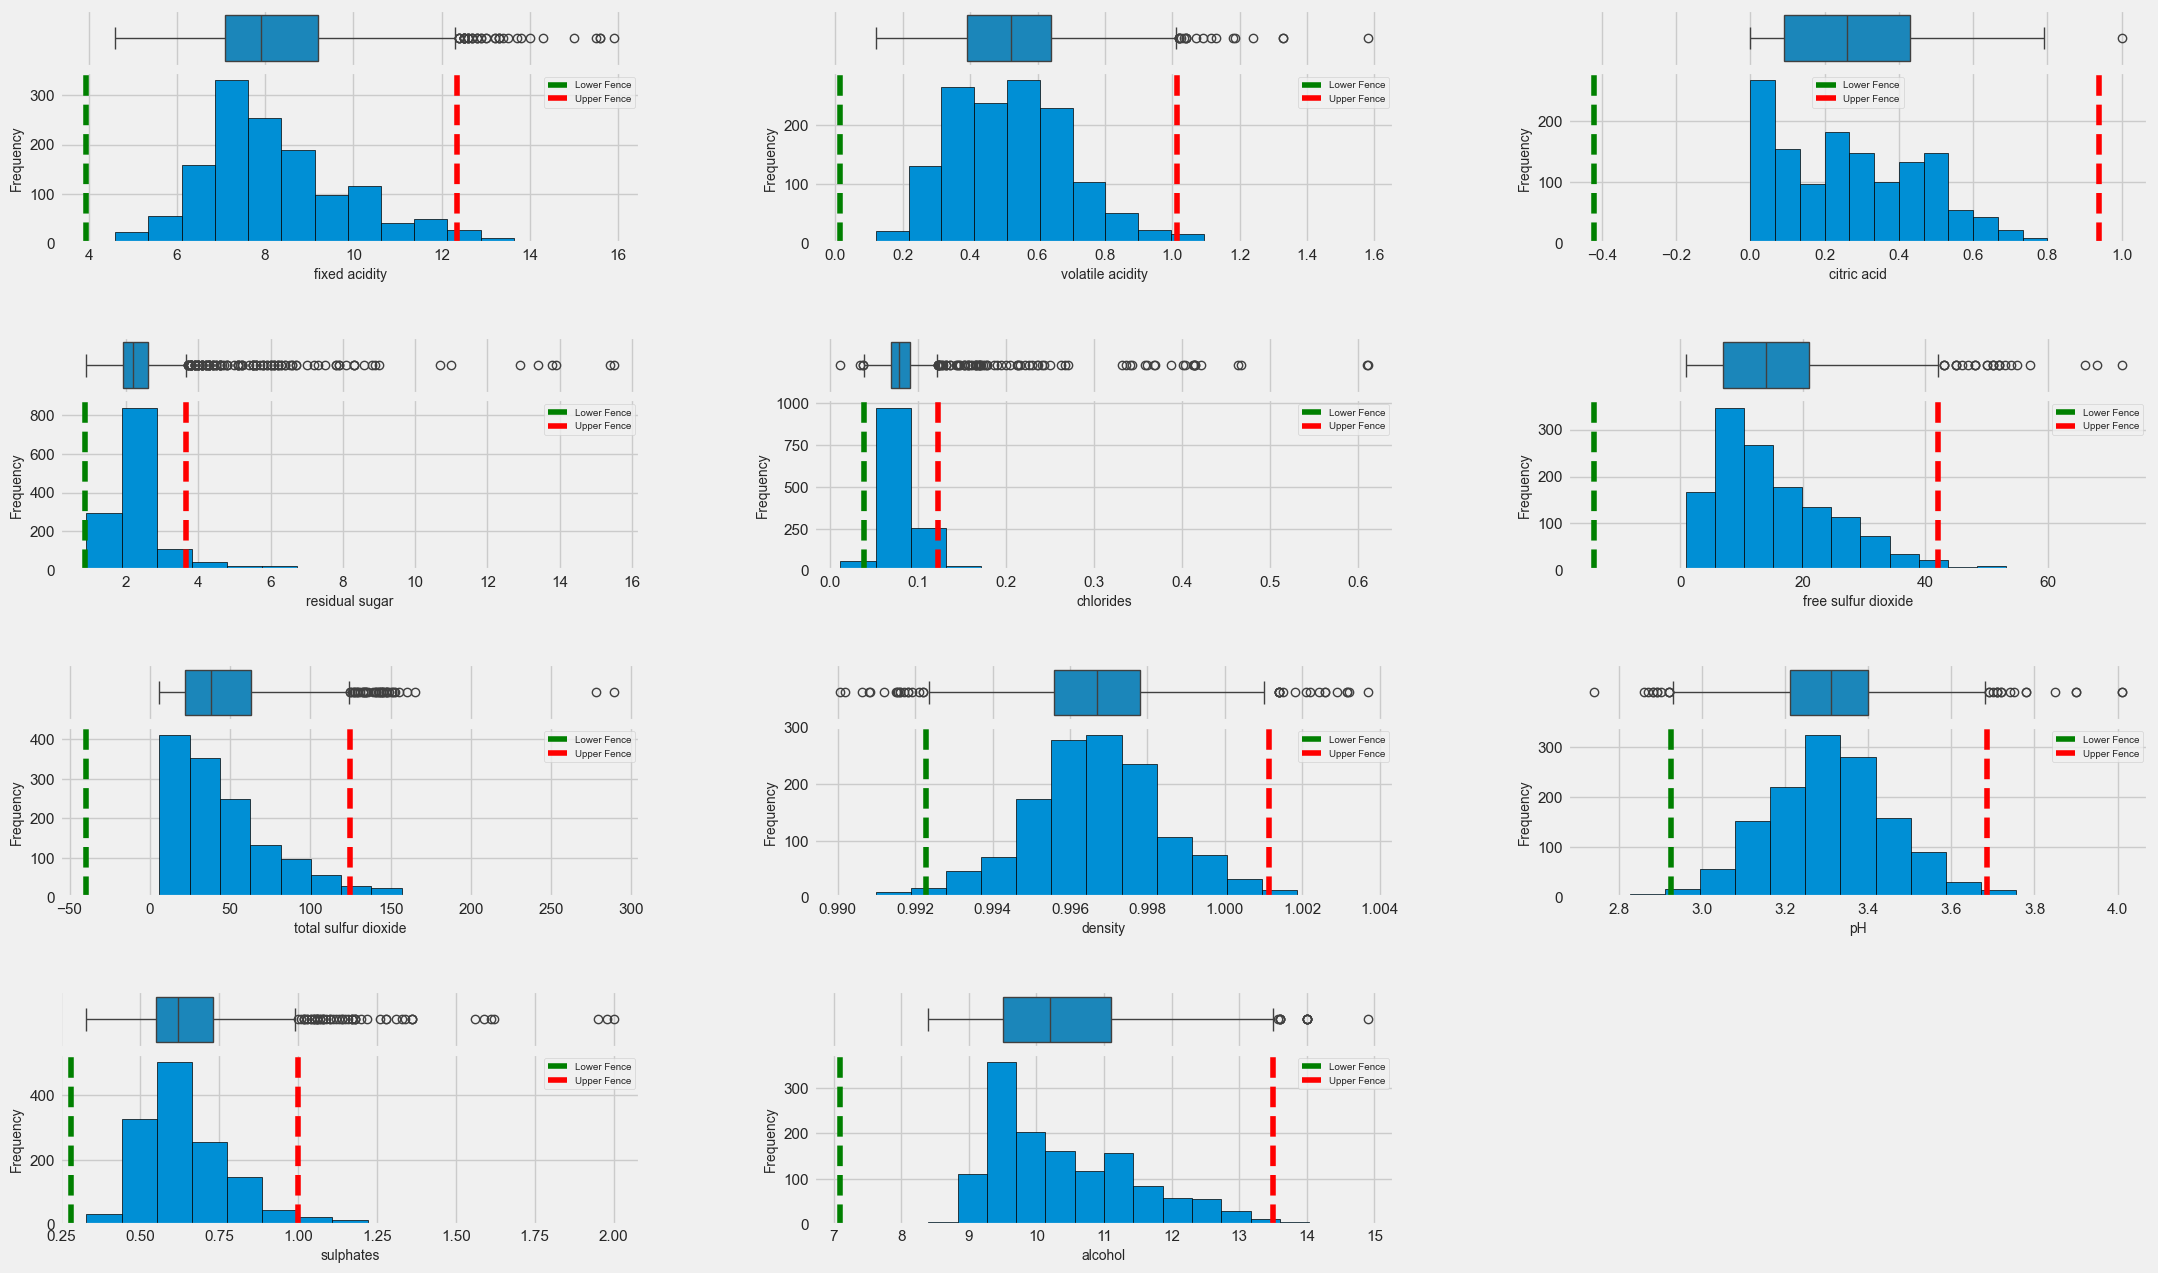

In [1487]:
def plot_outliers(df):
    # Set the number of rows and columns
    rows = 4
    cols = 3

    # Set the figure size and add a grid spec for the subplots
    fig = plt.figure(figsize=(24, 15))
    grid_spec = fig.add_gridspec(rows, cols, wspace=0.3, hspace=0.4)

    # Iterate over the features and add subplots
    for i, feature in enumerate(df.columns):
        # Calculate the row and column for the subplot
        row = i // cols
        col = i % cols

        # Add a 2-row sub GridSpec for each cell
        sub_gs = grid_spec[row, col].subgridspec(2, 1, height_ratios=[1, 3], hspace=0.05)

        # Add a boxplot and a histogram for each feature using the sub GridSpec
        ax_box = fig.add_subplot(sub_gs[0])
        ax_hist = fig.add_subplot(sub_gs[1], sharex=ax_box) # share the x-axis with the boxplot

  
        lower_inner_fence, upper_inner_fence = compute_fences(df, feature) # compute the fences
        
        # Add a boxplot
        sns.boxplot(x=df[feature], ax=ax_box)
        ax_box.set(xlabel='')    # remove the x-axis label
        ax_box.tick_params(bottom=False, labelbottom=False) # remove the x-axis tick labels

        ax_hist.hist(df[feature], bins=15, edgecolor="black") # add a histogram
        ax_hist.set_xlabel(feature, fontsize=10) # set the x-axis label
        ax_hist.set_ylabel("Frequency", fontsize=10) # set the y-axis label

        # Add fence lines
        ax_hist.axvline(lower_inner_fence, color='green', linestyle='--', label='Lower Fence')
        ax_hist.axvline(upper_inner_fence, color='red', linestyle='--', label='Upper Fence')
        ax_hist.legend(fontsize=7 )

    plt.show()

plot_outliers(df[features])

`Observation`
* **"alcohol"** and **citric acid** was the only feature having negligible outliers
* Only **"pH"** and **density** appeared to be normally distributed among all the features
* Most of the features were high **left/negative** skewed

In [1488]:
def detect_outliers(df, features):
    outlier_indices = [] # store the indices of the outliers

    # Iterate over each feature
    for feature in features:
        lower_inner_fence, upper_inner_fence = compute_fences(df, feature) # compute the lower and upper inner fences

        # find outliers for all less than lower and greater than upper inner fences
        outliers = df[(df[feature] < lower_inner_fence) | (df[feature] > upper_inner_fence)]  
        outlier_indices.extend(outliers.index) # add the indices of the outliers to the list

    # count the number of outliers for each index
    indices_count = {i: outlier_indices.count(i) for i in set(outlier_indices)}

    # keep only the indices that have more than 2 outliers
    outlier_indices = [i for i, v in indices_count.items() if v > 2]
    
    return outlier_indices

outliers = detect_outliers(df, features) # detect the outliers
df[df.index.isin(outliers)] # show outliers for each feature

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
14              8.9             0.620         0.18             3.8      0.176   
15              8.9             0.620         0.19             3.9      0.170   
151             9.2             0.520         1.00             3.4      0.610   
353            13.5             0.530         0.79             4.8      0.120   
364            12.8             0.615         0.66             5.8      0.083   
374            14.0             0.410         0.63             3.8      0.089   
415             8.6             0.725         0.24             6.6      0.117   
442            15.6             0.685         0.76             3.7      0.100   
515             8.5             0.655         0.49             6.1      0.122   
538            12.9             0.350         0.49             5.8      0.066   
554            15.5             0.645         0.49             4.2      0.095   
557            15.6             0.645         0.49             4.2      0.095   
559            13.0             0.470         0.49             4.3      0.085   
588             5.0             0.420         0.24             2.0      0.060   
614             9.2             0.755         0.18             2.2      0.148   
652            15.9             0.360         0.65             7.5      0.096   
695             5.1             0.470         0.02             1.3      0.034   
821             4.9             0.420         0.00             2.1      0.048   
1114            5.0             0.400         0.50             4.3      0.046   
1244            5.9             0.290         0.25            13.4      0.067   
1270            5.0             0.380         0.01             1.6      0.048   
1319            9.1             0.760         0.68             1.7      0.414   
1358            7.4             0.640         0.17             5.4      0.168   
1434           10.2             0.540         0.37            15.4      0.214   
1474            9.9             0.500         0.50            13.8      0.205   
1558            6.9             0.630         0.33             6.7      0.235   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
14                   52.0                 145.0  0.99860  3.16       0.88   
15                   51.0                 148.0  0.99860  3.17       0.93   
151                  32.0                  69.0  0.99960  2.74       2.00   
353                  23.0                  77.0  1.00180  3.18       0.77   
364                   7.0                  42.0  1.00220  3.07       0.73   
374                   6.0                  47.0  1.00140  3.01       0.81   
415                  31.0                 134.0  1.00140  3.32       1.07   
442                   6.0                  43.0  1.00320  2.95       0.68   
515                  34.0                 151.0  1.00100  3.31       1.14   
538                   5.0                  35.0  1.00140  3.20       0.66   
554                  10.0                  23.0  1.00315  2.92       0.74   
557                  10.0                  23.0  1.00315  2.92       0.74   
559                   6.0                  47.0  1.00210  3.30       0.68   
588                  19.0                  50.0  0.99170  3.72       0.74   
614                  10.0                 103.0  0.99690  2.87       1.36   
652                  22.0                  71.0  0.99760  2.98       0.84   
695                  18.0                  44.0  0.99210  3.90       0.62   
821                  16.0                  42.0  0.99154  3.71       0.74   
1114                 29.0                  80.0  0.99020  3.49       0.66   
1244                 72.0                 160.0  0.99721  3.33       0.54   
1270                 26.0                  60.0  0.99084  3.70       0.75   
1319                 18.0                  64.0  0.99652  2.90       1.33   
1358                 52.0                  98.0

In response to the significant proportion of outliers identified by the 1.5xIQR rule in outlier detection process as shown above, the Winsorization method was applied to constrain these extreme observations to a specified statistical boundary. This approach was strategically chosen over outlier removal to mitigate the skewing effect of outliers on feature distributions while crucially preserving the entire sample size for a more robust modeling phase.

In [1489]:
!pip3 -q install feature_engine

Number of outliers: 0


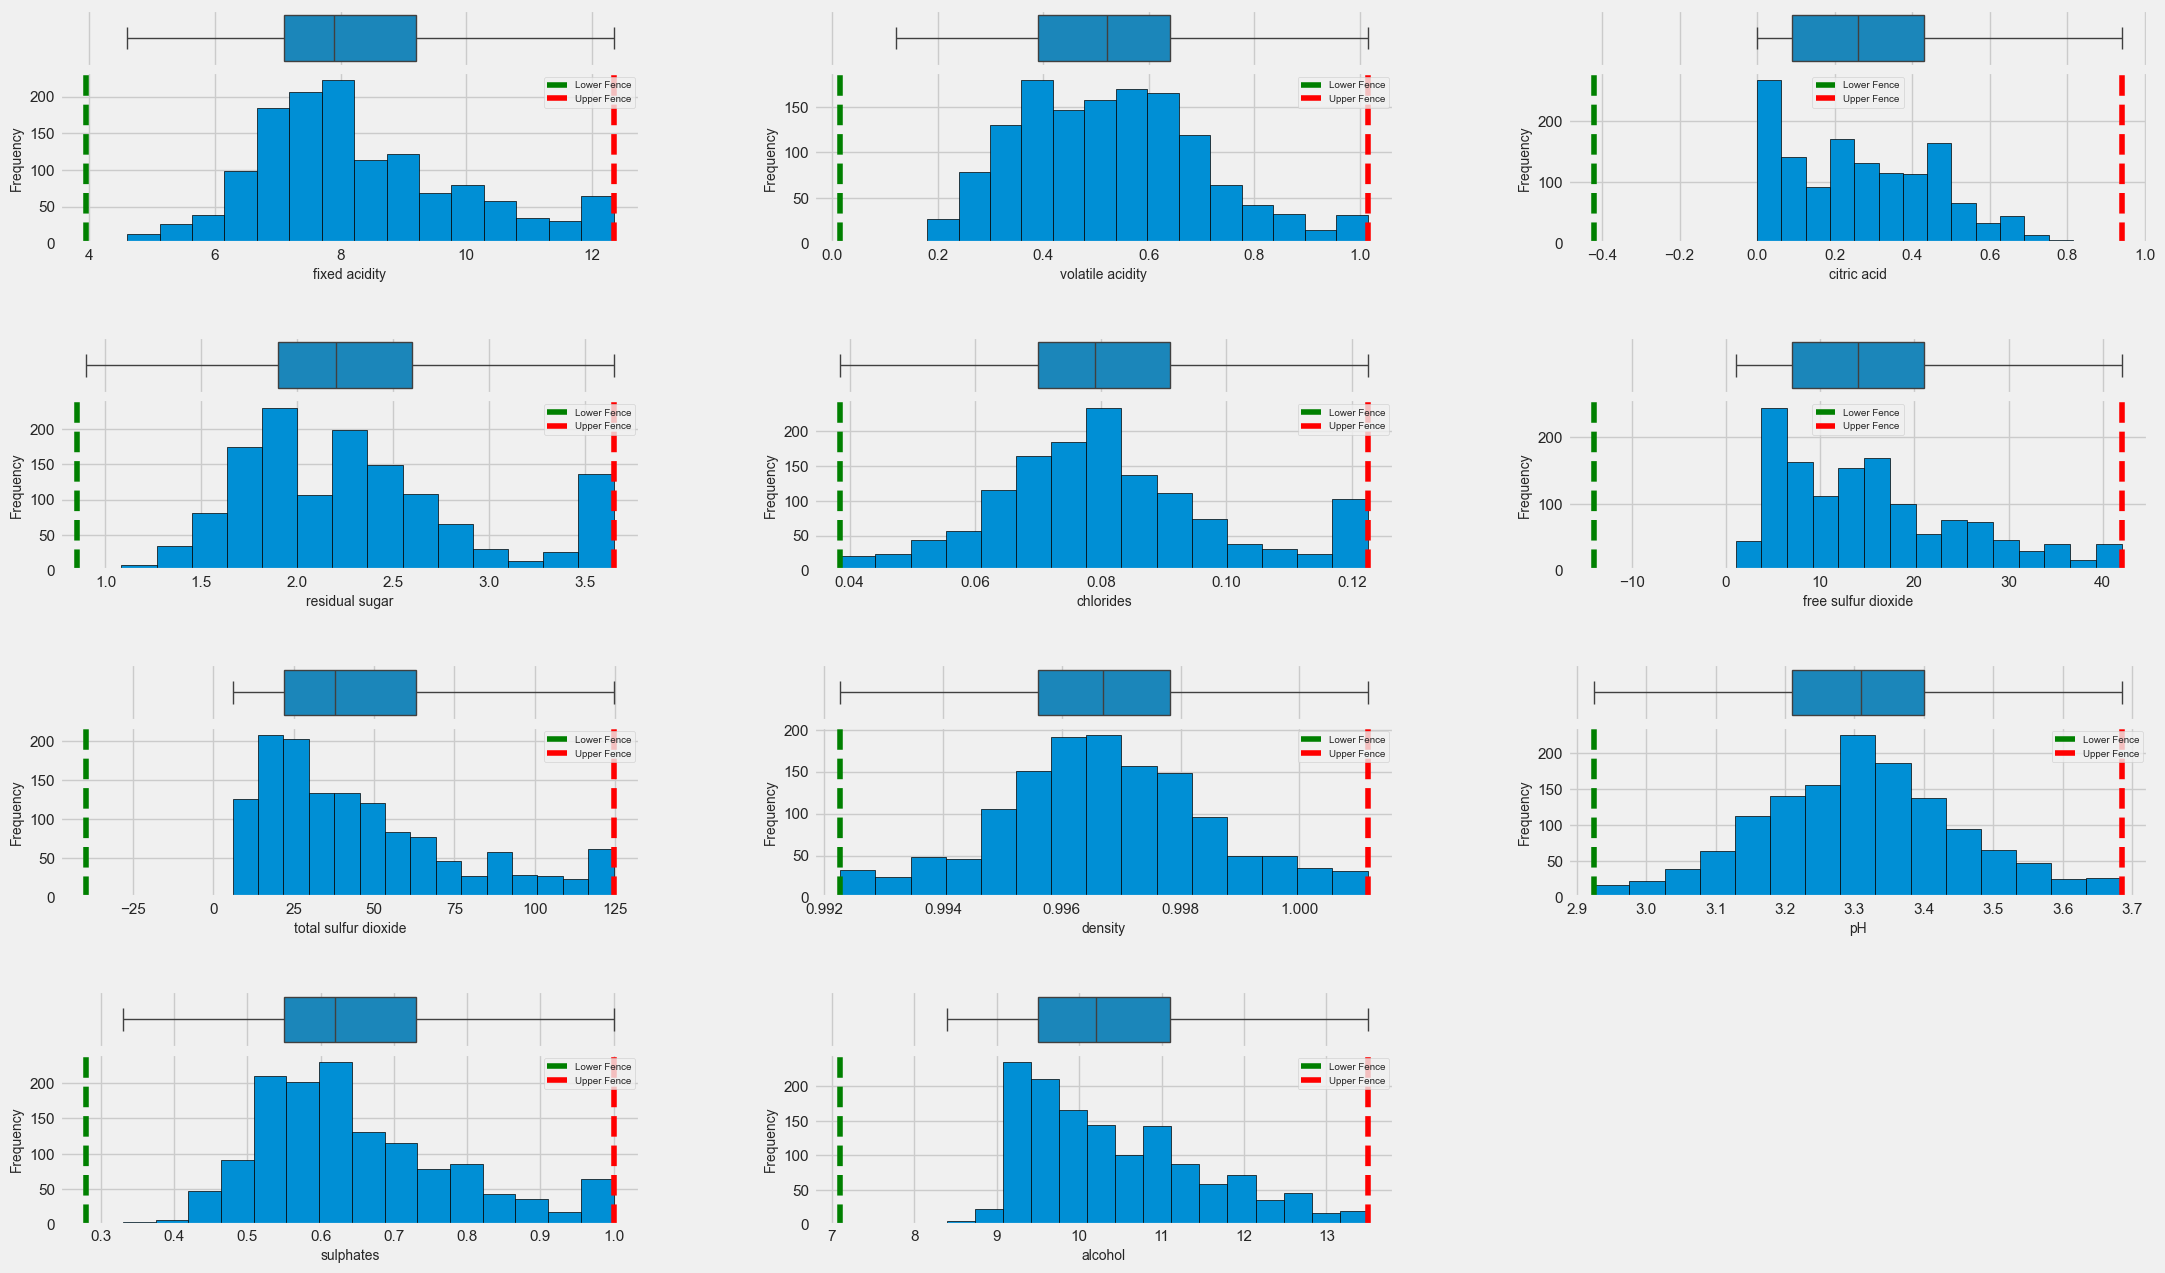

In [1490]:
from feature_engine.outliers import Winsorizer
winsorizer = Winsorizer(
    capping_method='iqr', # cap values at the 1st and 3rd quartile
    tail='both', # cap both tails
    fold=1.5, # multiply the IQR by 1.5
    variables= df.columns[0:-1].to_list() # features to be winsorized
)

df = winsorizer.fit_transform(df) # apply winsorization to the dataframe

outliers = detect_outliers(df, df.columns[:-1])
print(f"Number of outliers: {len(outliers)}")

plot_outliers(df[df.columns[:-1]])

## 2.4 Initial Data Exploration  <a class="anchor"></a>

### 2.4.1 Distributions  <a class="anchor"></a>

In [1491]:
df.quality.unique() # show unique values of quality

array([5, 6, 7, 4, 8, 3])

`It is visible that wine quality score ranges from 3-9 in this dataset`

In [1492]:
def count_values_table(df):
        count_val = df.value_counts() # count the number of values in each column
        count_val_percent = 100 * df.value_counts() / len(df) # calculate the percentage of each count
        count_val_table = pd.concat([count_val, count_val_percent.round(1)], axis=1) # concatenate the count and percentage
        count_val_table.columns = ['Count Values', '% of Total Values']# rename the columns
        return count_val_table

count_values_table(df["quality"])

Count Values  % of Total Values
quality                                 
5                 577               42.5
6                 535               39.4
7                 167               12.3
4                  53                3.9
8                  17                1.3
3                  10                0.7

`It was clearly identified that dataset has most entries with wine quality score more than 4`

In [1493]:
# Histogram
def hist_chart(df, features):
    fig = plt.figure(figsize=(24, 15)) # set the figure size
    for i, feature in enumerate(features):
        ax = fig.add_subplot(3, 4, i+1) # set the subplot, 3 rows, 4 columns, i+1 is the index of the subplot
        sns.histplot(df[feature], kde=True, bins=10, ax=ax) # plot the histogram
        ax.set_xlabel(feature) # set the x-axis label of the subplot
        ax.set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()

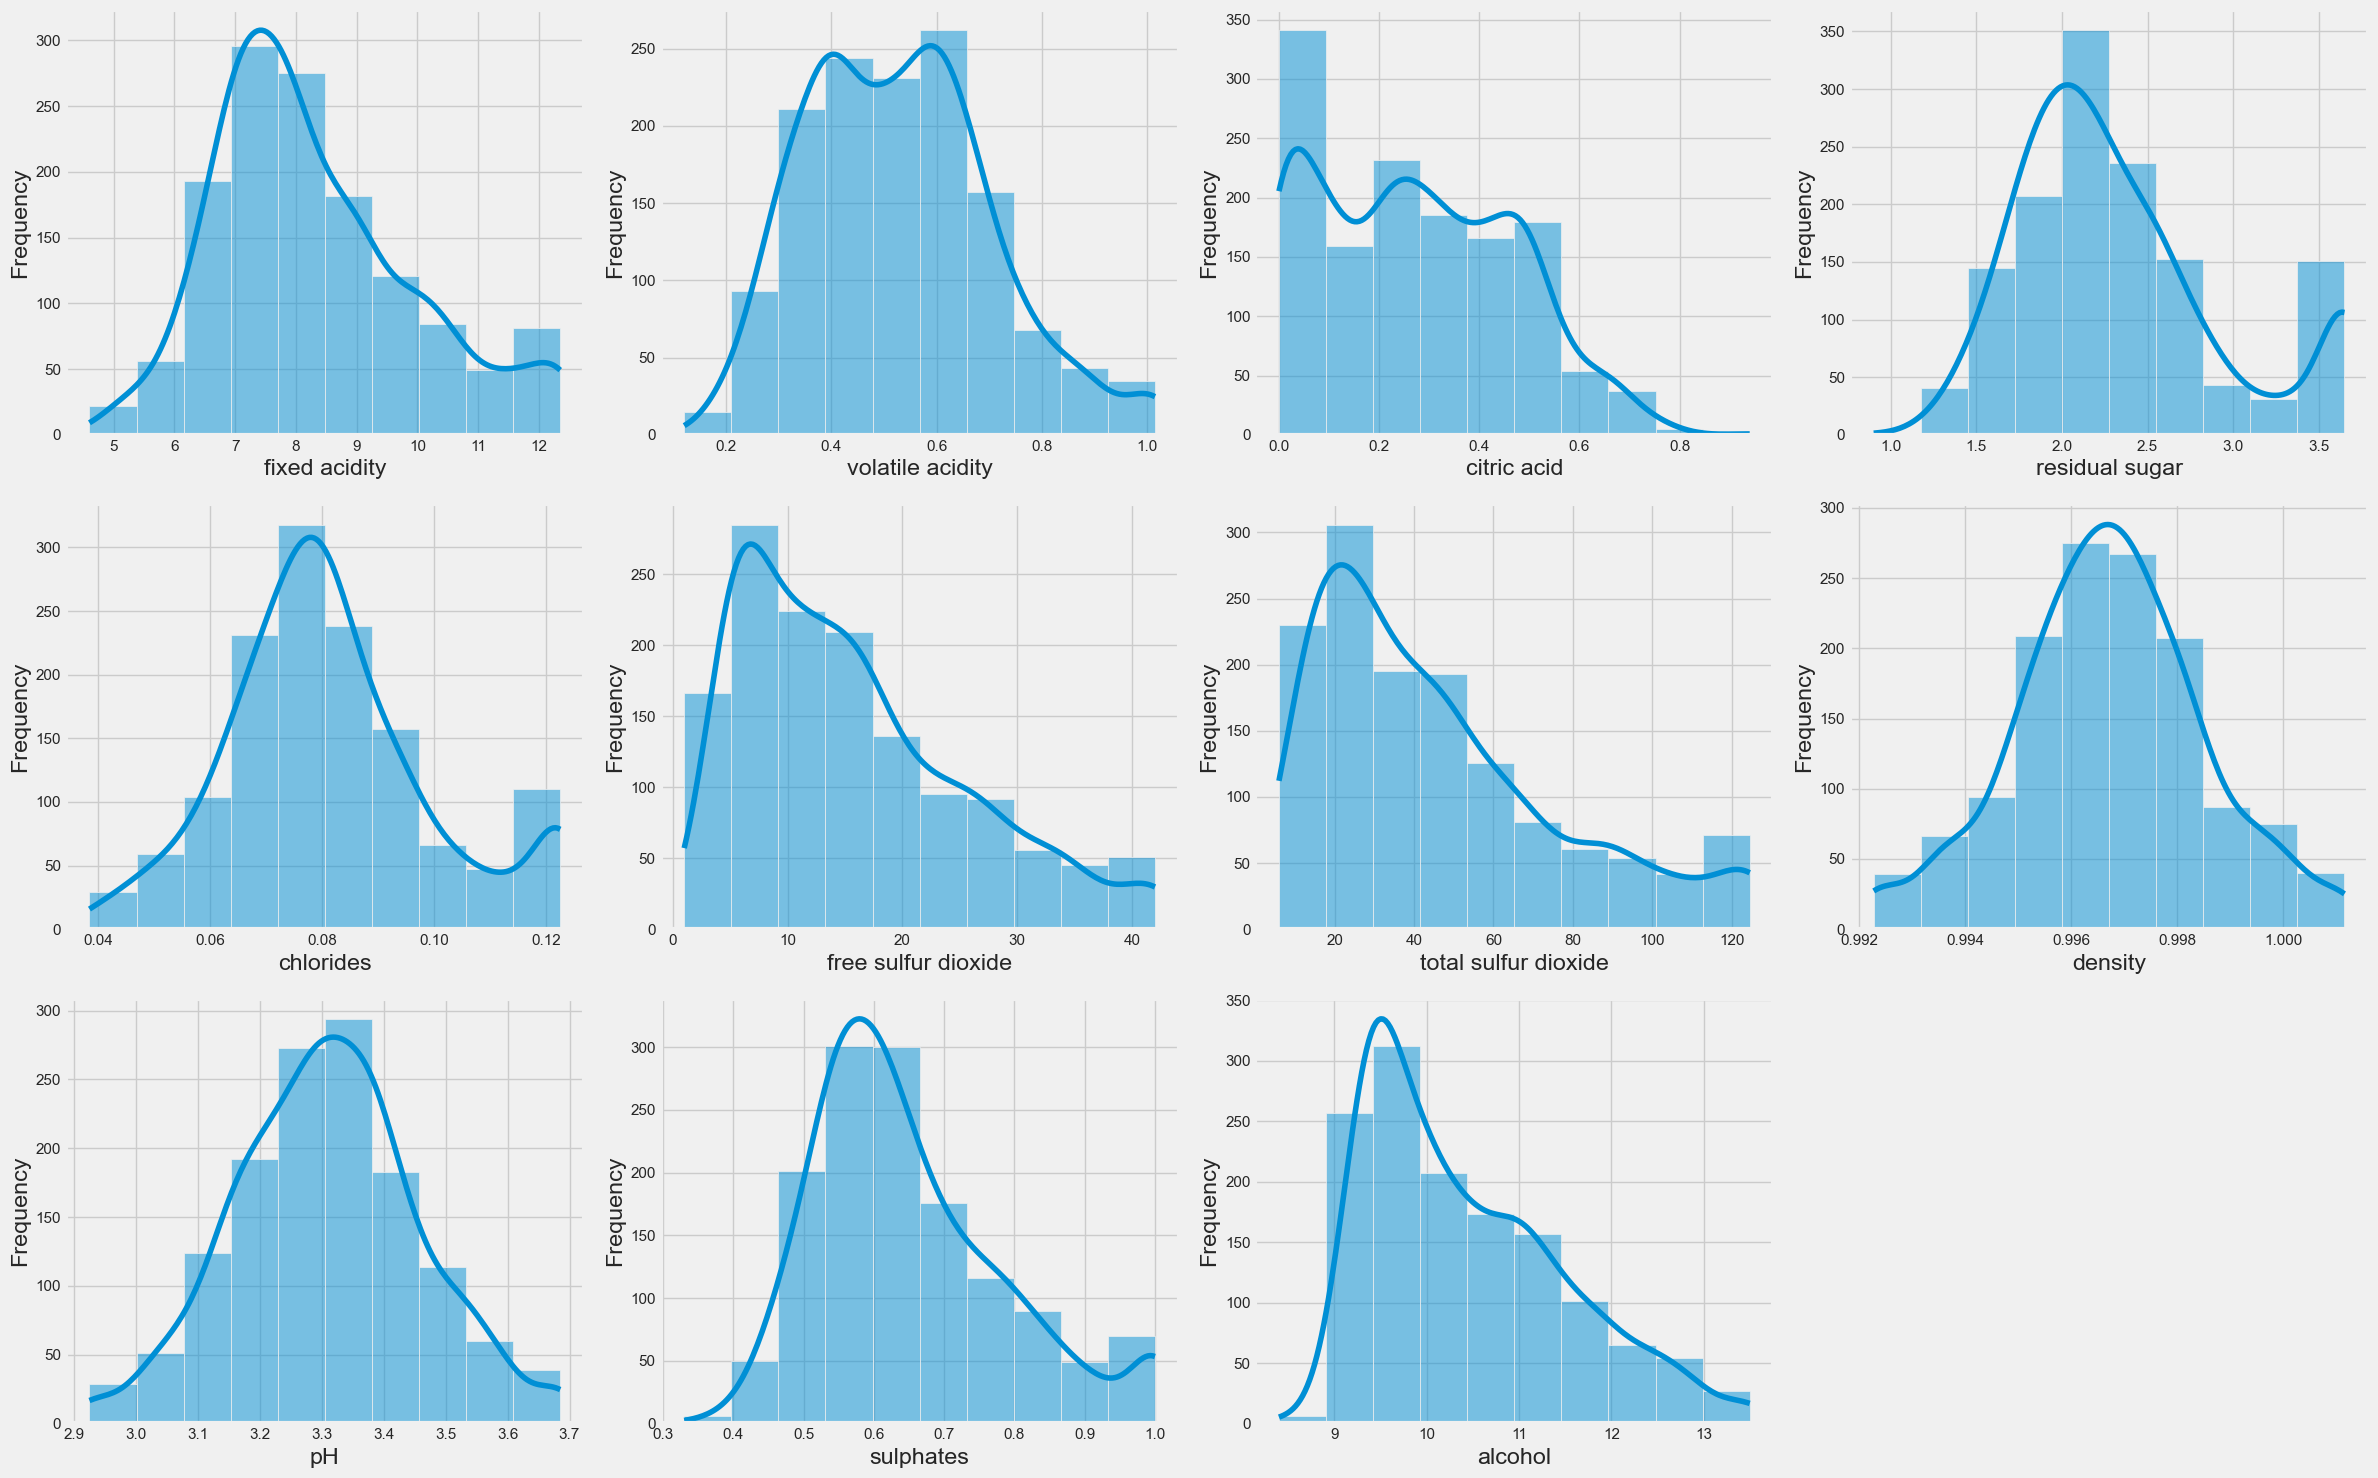

In [1494]:
hist_chart(df, df.columns[:-1])

### Comments on Feature Distributions

The histograms analysis gave a good visual representation of the univariate distribution of each chemical attribute in wine data. The most important notes were that:

**Left-Skewed Distribution**: It was found that most of the features displayed a high negative (left) skew.

**Approximately Normal Distributions**: On the contrary, only two features(density and pH showed) approximately normal (symmetrical) distribution. Their bell shaped curves indicated that the values had been well spread around a central mean.

**Potentially Bimodal or Irregular Distributions**: A several number of features uncovered more complicated patterns(i.e., alcohol, citric acid)

**Data Preparation Implications**: The prevalence of skewness found throughout the data has made it clear that data transformation methods will be an important procedure in the Data Preparation phase so that the variables become more standard to fit the learning models which will make assumptions about the data being normally distributed.

### 2.4.2 Correlations  <a class="anchor"></a>
Both visual methods and quantitative methods were used to proceed with the inter-variable relationships found in the dataset as part of the exploratory data analysis process. To provide an overview analysis of the data, a pairplot was created following the instruction of the documentation of Seaborn library to make a visual analysis broadly. It is formal to plot each variable against all variables giving a scatterplot matrix of bivariate analysis and a histogram plot in case of univariate analysis(Waskom, nd). After that, a Pearson correlation matrix was calculated to measure the linearly related variables. To make it more meaningful to interpret, this matrix was visualized as a heatmap where each temperature scale reflects a color scale that gives the freedom to instantly judge which positive and negative correlations are most important.

Pairplot documentation is found here: https://seaborn.pydata.org/generated/seaborn.pairplot.html

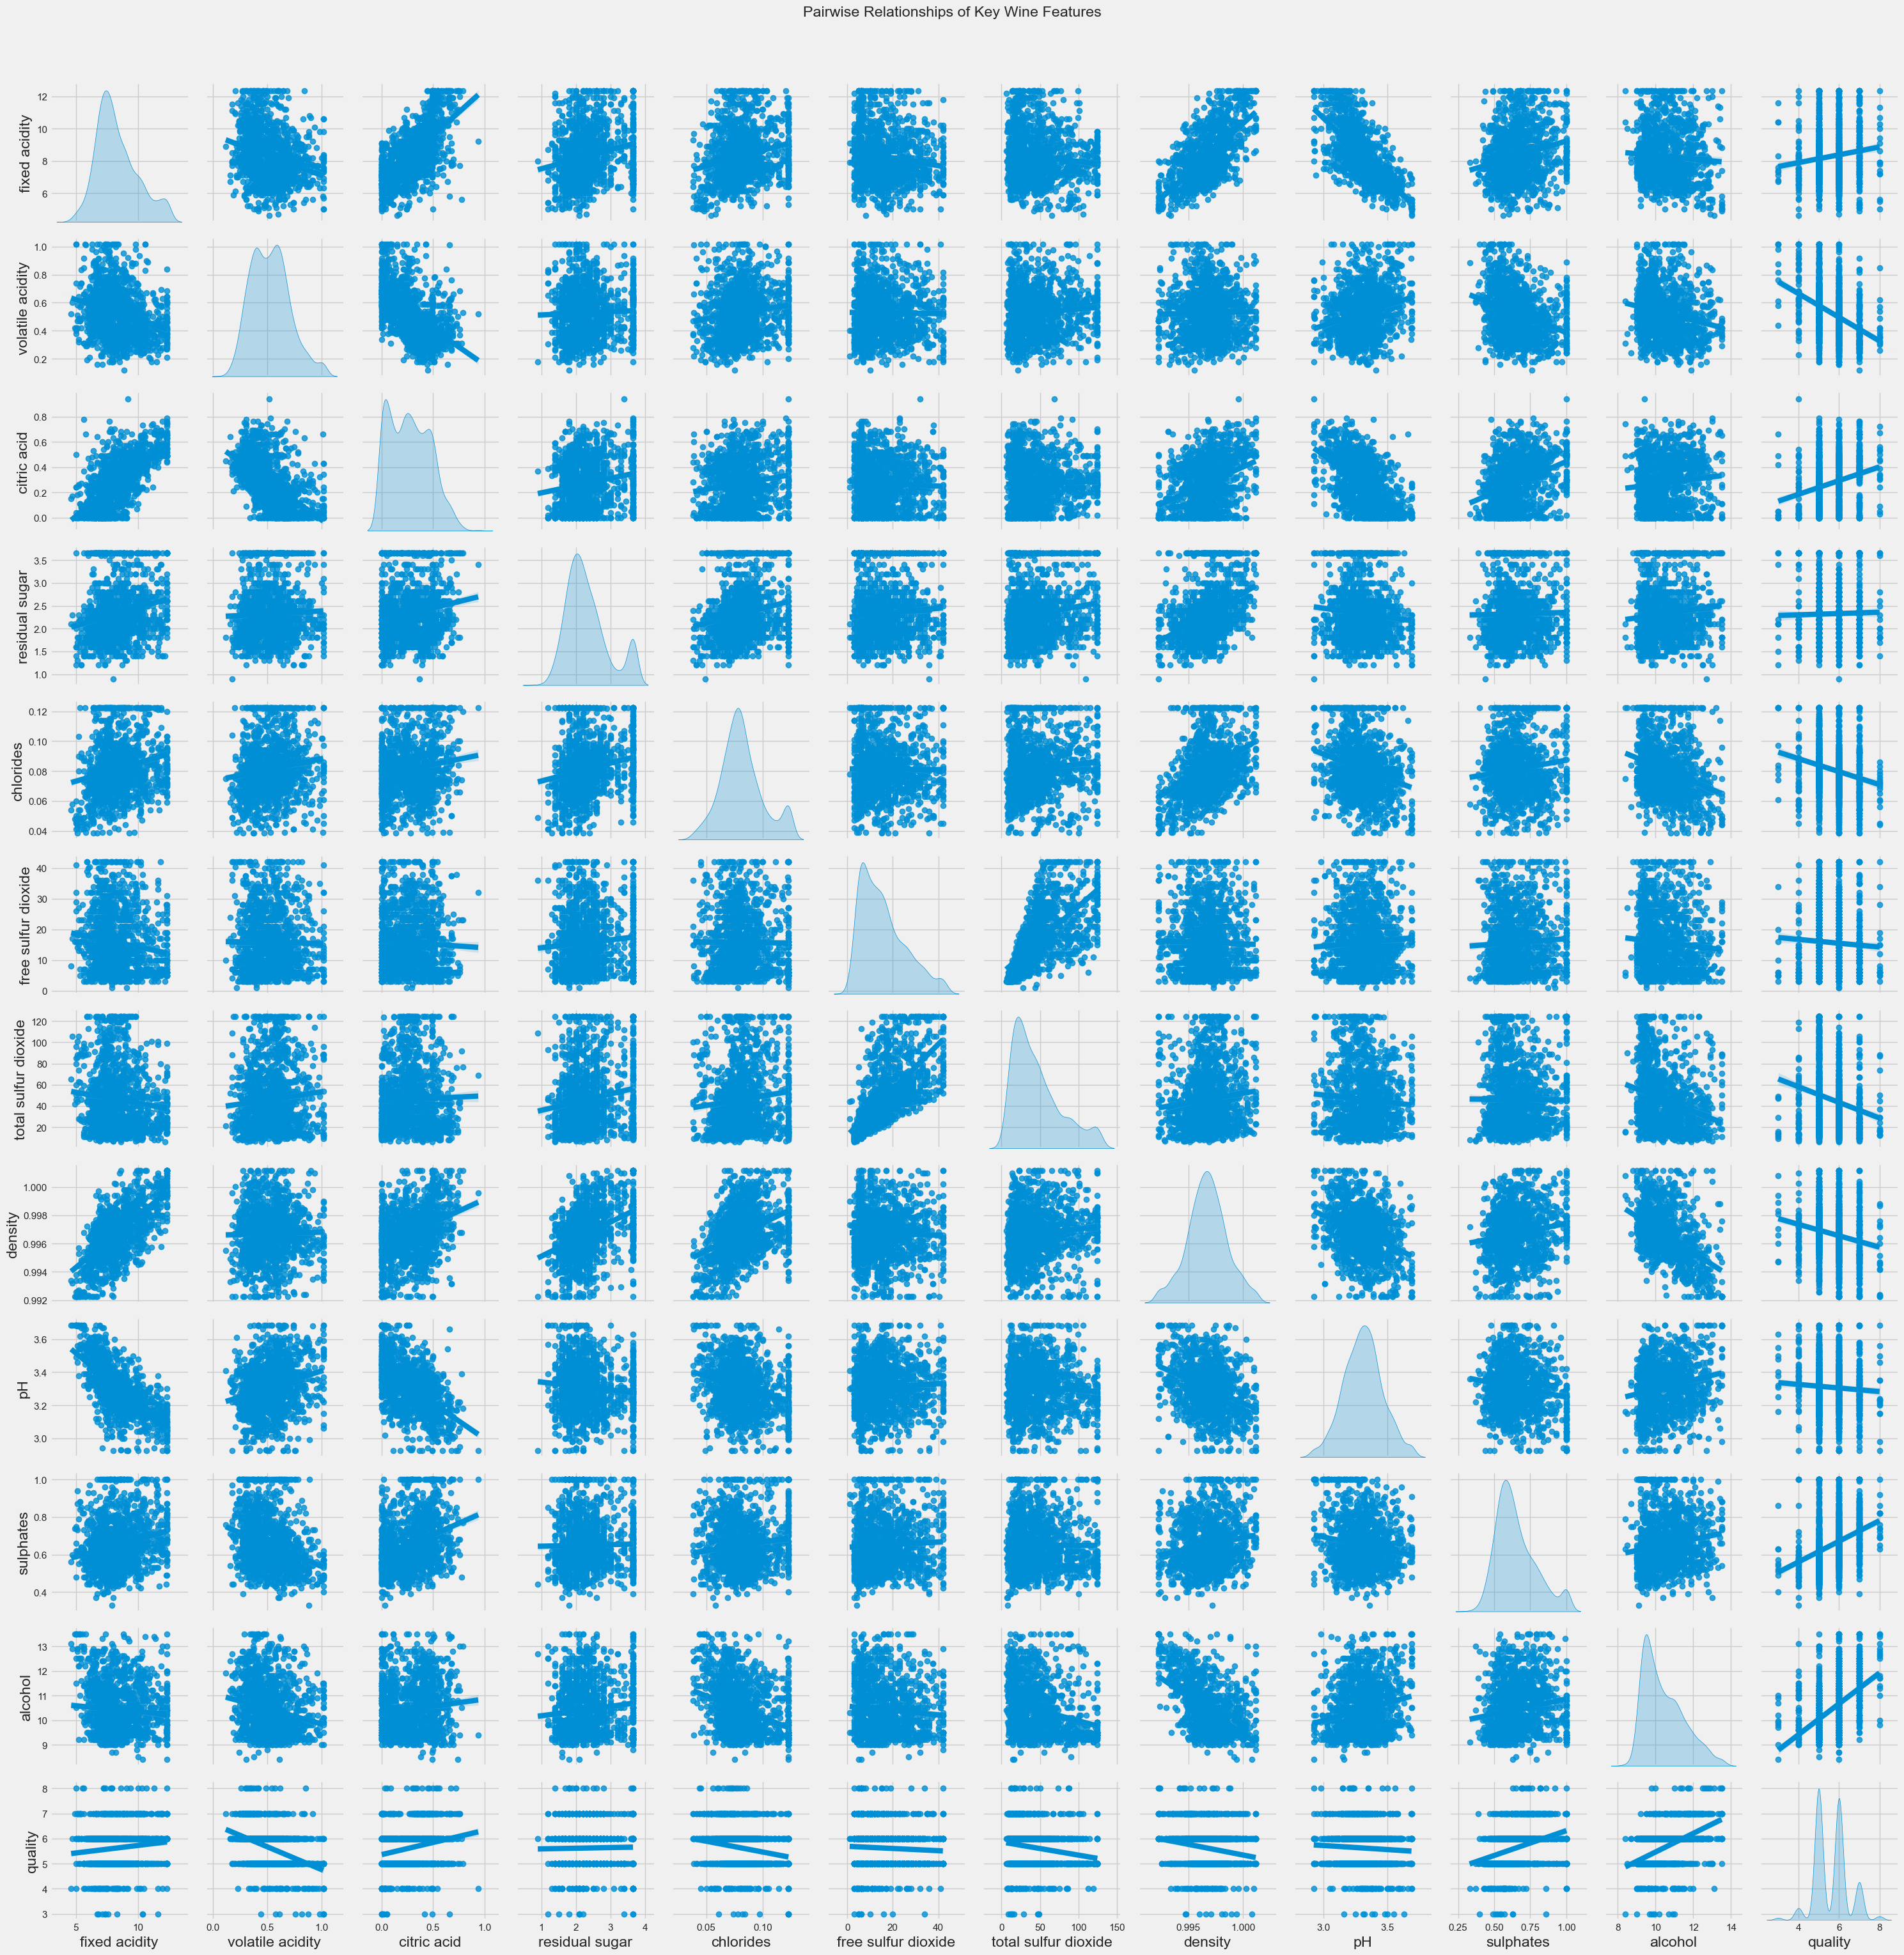

In [1495]:
sns.pairplot(
    data=df,  # dataframe to get pairwise relationships
    vars=df.columns,
    kind='reg',
    diag_kind='kde'    # kde refers to kernel density estimation for the diagonal  # customize regression line
)

plt.suptitle("Pairwise Relationships of Key Wine Features", y=1.02) # y is used to set the y-axis position of the title
plt.tight_layout() 
plt.show()

The pairplot gives an in-depth visual summary of *Feature vs Quality* and *Feature vs Feature* relationship. <br><br>
**Most Important Variables (with respect to quality)**:The most important individual predictor of quality is **alcohol**, which has a definite positive trend in that higher alcoholic content results in higher ratings of quality. The other important variables are **sulphates, volatile citric acid** with weak trends with respect to quality. The rest of the variables are not directly attributed to the quality score by much or at all.


**Important Inter-variable Relationships:** A number of good linear relationships exist among predictor variable themselves:
- There is a wide significance of negative correlation between alcohol and density
- There is a moderate positive correlation aong fixed acidity, citric acid and density
- There is a strong negative association between fixed acidity and pH
- There is a significant positive correlation between total sulfur dioxide and free sulfur dioxide 
<br>
<p>In order to formally measure the linear correlation associations that were indicated by the pairplot a Pearson correlation matrix was calculated. Pearson correlation coefficient indicates how strong or weak the relation between two variables(Nettleton, 2014). In order to have a better understanding of this matrix, the results have been produced into a heatmap. The given visualization method employs the color grade to represent the correlations coefficients and the identification of the strongest relationships can be performed easily.</p>

alcohol                 0.482710
volatile acidity        0.392130
sulphates               0.330642
citric acid             0.228687
total sulfur dioxide    0.196789
chlorides               0.193758
density                 0.185181
fixed acidity           0.120636
pH                      0.059400
free sulfur dioxide     0.052015
residual sugar          0.019115
Name: quality, dtype: float64


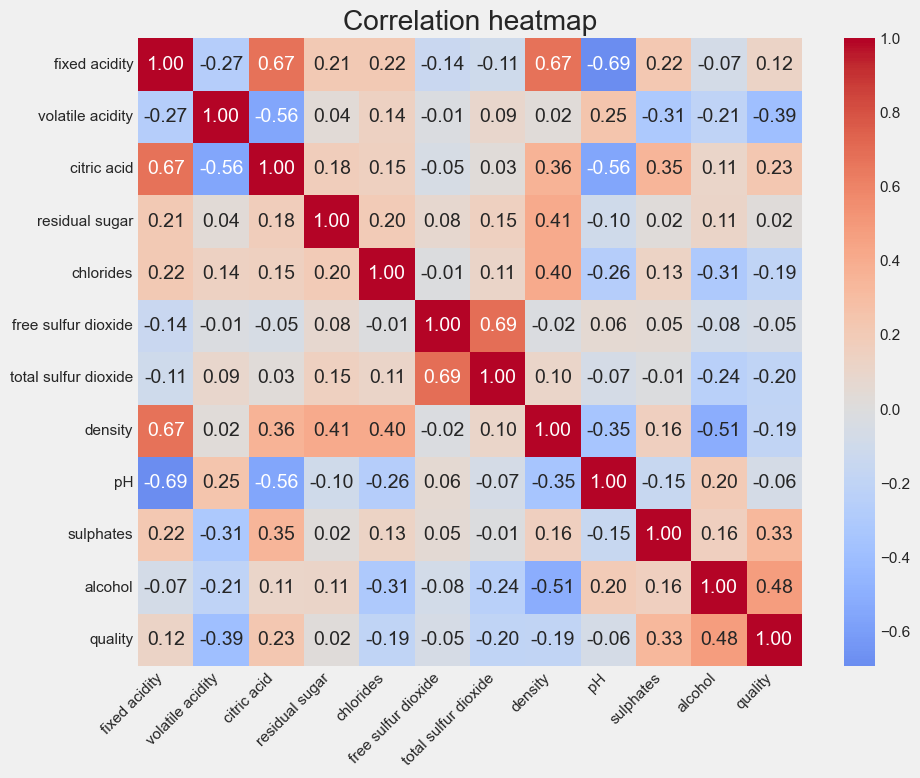

In [1496]:
corr = df[df.columns].corr() # correlation matrix for all features except quality
print(corr["quality"].abs().sort_values(ascending=False).drop(["quality"])) 

plt.figure(figsize=(10, 8))
sns.heatmap(corr, 
            annot=True, # show the correlation values in the heatmap
            cmap='coolwarm', # color map
            center=0, # center the color map at 0
            fmt='.2f' # format the correlation values to 2 decimal places
            )

plt.title("Correlation heatmap")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Findings
The heatmap analysis confirmed that 'alcohol' exhibited the most significant linear relationship with the target variable, quality (r = 0.48). Furthermore, it quantified the secondary importance of volatile acidity (r = -0.39), sulphates (r = 0.33), and citric acid   (r = 0.23). Based on these coefficients, these four variables were selected as the most promising predictors for inclusion in a linear model.

Within this selected subset of features, a notable degree of multicollinearity was observed between volatile acidity  and citric (r = -0.56). Although this correlation is significant, both variables were also found to be among the strongest individual predictors of quality. Therefore, for the data preparation phase, all the features were retained as predictor for the initial model construction. The trade-off of possible inflation of the variance of the coefficients in the model resulting from this collinearity was considered to be a tolerable consequence to prevent the loss of information which would have occurred through elimination of an important predictor. However, advanced model like Ridge Regression would be used to handle collinearity for optimal performance.

# 3. Stage Three - Data Preparation <a class="anchor"></a>

## 3.1 Select Your Data <a class="anchor"></a>
Selection of the four features (alcohol, citric acid, volatile acidity, and sulphates) was based on their highest linear relationship with the target variable, quality. But there were some more features highly correlated those four selected features. To make the feature selection more robust and automatic "SmartCorrelatedSelection" was applied for best selection of features.


In [1497]:
from feature_engine.selection import SmartCorrelatedSelection

target = 'quality' # target variable



tr = SmartCorrelatedSelection(
    variables=None, # all features
    method="pearson", # pearson correlation
    threshold=0.65, # threshold for correlation
    missing_values="raise", # raise error if missing values are found
    selection_method="variance" # variance threshold
)
tr.fit_transform(df) # fit and transform the data

features = tr.get_feature_names_out()[:-1] # get the automated selected features

df_selected = df[features + [target]] # create a new dataframe with the selected features

df_selected.head()


fixed acidity  volatile acidity  residual sugar  chlorides  \
0            7.4              0.70             1.9      0.076   
1            7.8              0.88             2.6      0.098   
2            7.8              0.76             2.3      0.092   
3           11.2              0.28             1.9      0.075   
5            7.4              0.66             1.8      0.075   

   total sulfur dioxide  sulphates  alcohol  quality  
0                  34.0       0.56      9.4        5  
1                  67.0       0.68      9.8        5  
2                  54.0       0.65      9.8        5  
3                  60.0       0.58      9.8        6  
5                  40.0       0.56      9.4        5

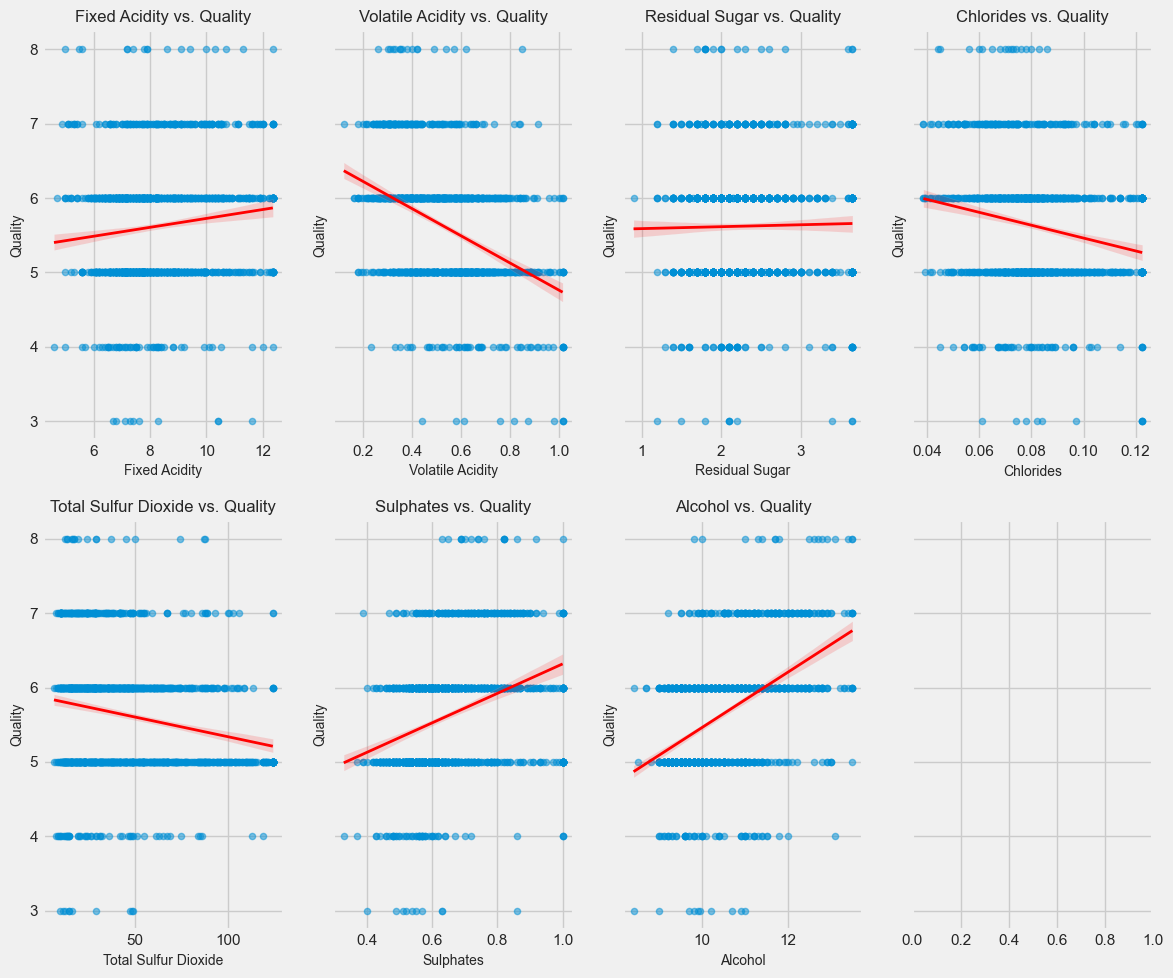

In [1498]:
fig, axes = plt.subplots(2, 4, figsize=(12, 10), sharey=True)

for ax, feat in zip(axes.flatten(), df_selected[features]):
    sns.regplot(
        x=feat,
        y='quality',
        data=df,
        ax=ax,
        scatter_kws={'alpha':0.5, 's':20},
        line_kws={'color':'red', 'lw':2},
    )
    ax.set_title(f'{feat.title()} vs. Quality', fontsize=12)
    ax.set_xlabel(feat.title(), fontsize=10)
    ax.set_ylabel('Quality', fontsize=10)


plt.tight_layout()
plt.show()

It was clearly visible that "SmartCorrelatedSelection" selected features were obviously the best selected feature which was already analysed during data exploration.





In [1499]:
features.remove('residual sugar')
features.remove('fixed acidity')
features.remove('total sulfur dioxide')

In [1500]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_selected[features], df_selected[target], test_size=0.2, random_state=42)

# Print the shape of the training and testing sets to verify the split
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (1087, 4)
Testing set shape: (272, 4)


## 3.2 Clean The Data <a class="anchor"></a>
It is crucial to mention that there was one final step of eliminating duplicates after feature selection and outlier work. Though some basic duplicate check was done on the complete data, some new duplicates might have been created by the preprocessing activity. Because the dataset will have been reduced to the six chosen columns (five features and the target variable), certain rows that were once unique in all the original columns, may end up being duplicates. Moreover, identical records may be also generated during the outlier capping procedure (Winsorization). Hence, this second verification made this stage very critical in order to obtain the final dataset to be used in modeling with only unique records.

In [1501]:
# Get indices of duplicate rows in X_train
duplicates_train = X_train.duplicated()
print(f"Number of duplicate entries in training set: {duplicates_train.sum()}")

# Remove duplicates from X_train and get indices of kept rows
X_train = X_train.drop_duplicates()

# Keep only corresponding rows in y_train 
y_train = y_train[X_train.index]

assert len(X_train) == len(y_train), "Number of entries in training set is not correct"
print(f"Training set shape: {X_train.shape}")

Number of duplicate entries in training set: 3
Training set shape: (1084, 4)


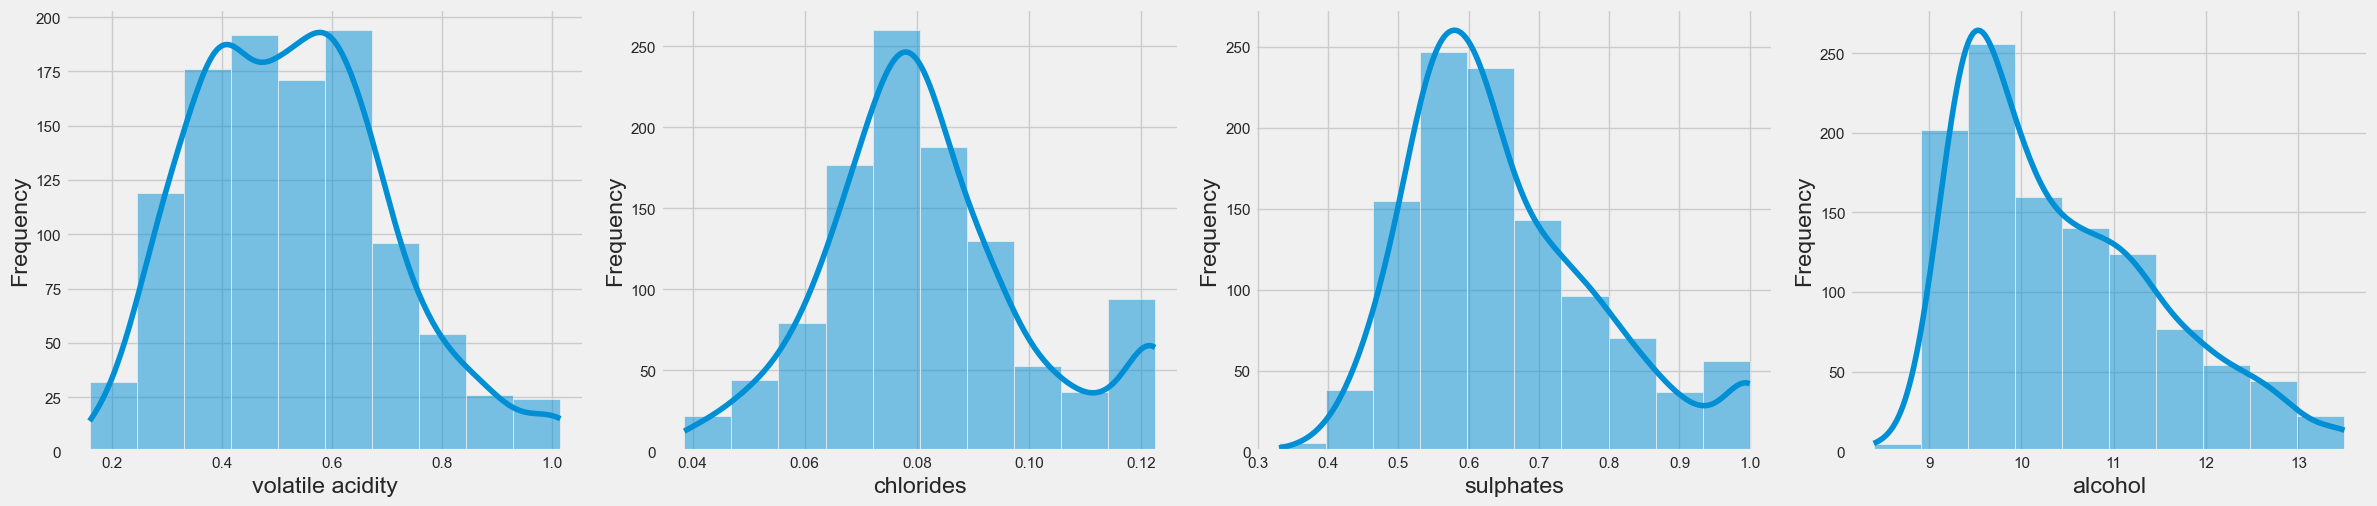

In [1502]:
hist_chart(X_train, X_train.columns)

The distribution analysis of features chosen indicated that they existed on different scales and had different distributions of skewness. Since the regression model could be biased when using features with high inherent variance, feature scaling was applied as an important data preparation process. StandardScaler was used to put every feature on the same scale as it shifted each feature making its mean value zero and standard deviation one before the feature was added to the model (Han et al., 2012).

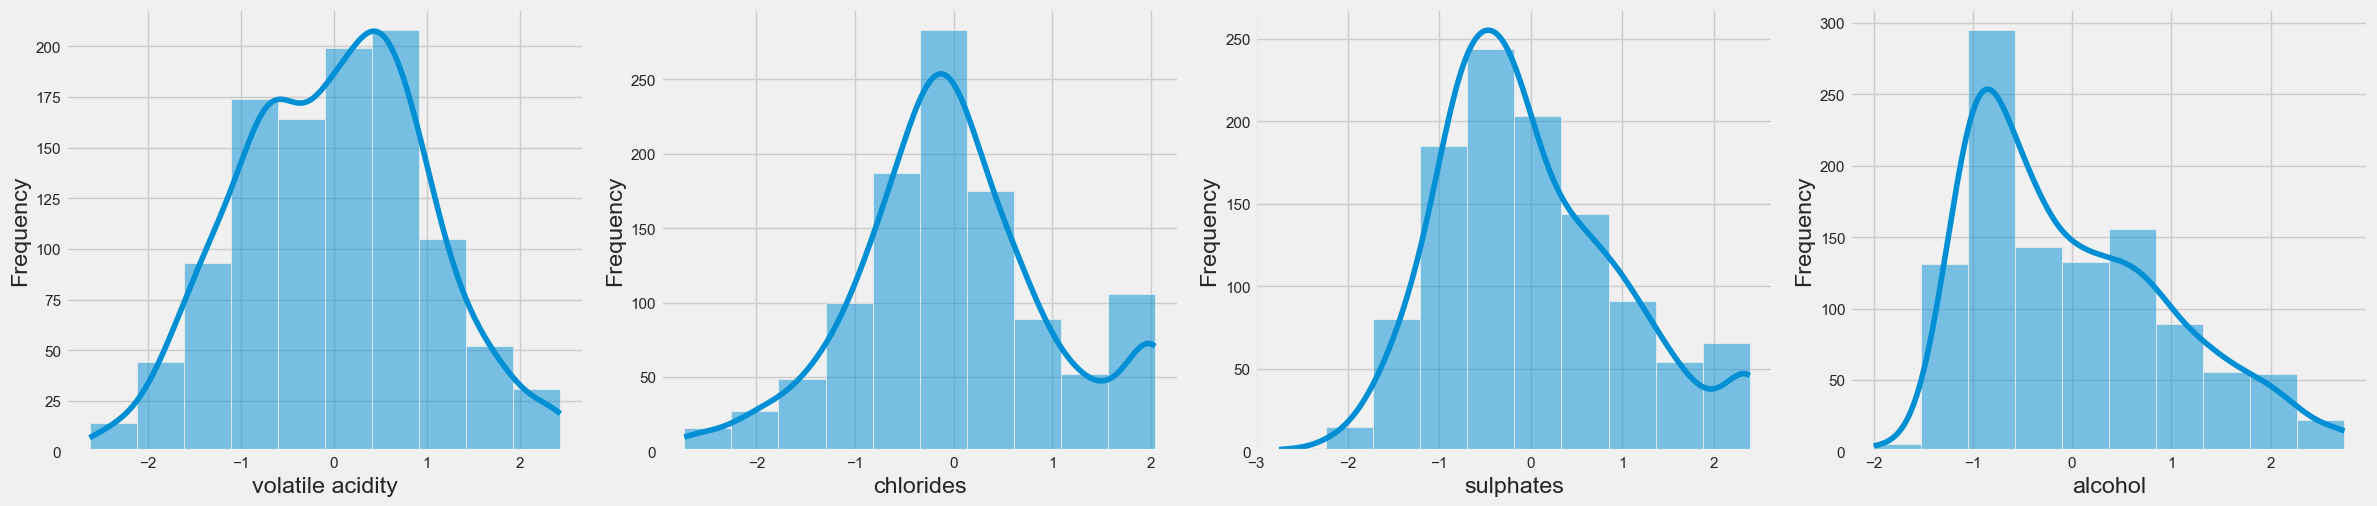

In [1503]:
# Scale the features using StandardScaler
from sklearn.preprocessing import StandardScaler
from feature_engine.transformation import PowerTransformer

power_transformer = PowerTransformer(variables=features) # power transformer to transform the features to make them more normally distributed
X_train_power = power_transformer.fit_transform(X_train) # fit and transform the training data
X_test_power = power_transformer.transform(X_test) # transform the test data


# Fit and transform the training data
scaler = StandardScaler() # standard scaler to scale the features
X_train_scaled = scaler.fit_transform(X_train_power) # fit and transform the training data
X_test_scaled = scaler.fit_transform(X_test_power) # fit and transform the test data

# Convert back to DataFrame to plot histogram
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Visualize the scaled features
hist_chart(X_train_scaled, X_train_scaled.columns)


# 4. Stage Four - Modelling <a class="anchor"></a>


## 4.1. Modelling technique <a class="anchor"></a>
* **LinearRegression**: This is the standard, baseline regression model that finds the best straight-line fit to the data.

* **Ridge**: This is a regularized version of linear regression that adds a penalty to prevent the model's coefficients from becoming too large. It is particularly effective at handling multicollinearity.

* **Lasso**: This is another regularized linear regression model that can shrink some feature coefficients all the way to zero, effectively performing automatic feature selection by ignoring less important variables.

* **ElasticNet**: This model combines the properties of both Ridge and Lasso, allowing it to handle multicollinearity while also performing feature selection.

* **RandomForestRegressor**: This is a powerful ensemble model that builds many decision trees and averages their predictions. It is highly effective at capturing complex, non-linear relationships in the data and is very robust against overfitting.

All the models have been implemented using sklearn api documentation available in <a href="https://scikit-learn.org/stable/api/sklearn.linear_model.html">here</a>

In [1504]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import GridSearchCV

models = {
        'LinearRegression': LinearRegression(), # model for baseline
        'Ridge': Ridge(random_state=42), # model handling multicollinearity
        'Lasso': Lasso(random_state=42), # model handling multicollinearity and sparsity
        'ElasticNet': ElasticNet(random_state=42), # model handling multicollinearity and sparsity
        'RandomForest': RandomForestRegressor(random_state=42), # model handling non-linear relationships
    }


## 4.2. Modelling assumptions <a class="anchor"></a>
The validity and reliability of the Linear Regression model's results are contingent upon several key assumptions. The most critical of these are:


* **No Duplicate Data**: The duplicate entries in the dataset was properly removed as it can create bias and noise in data. This assumption was validated through two-step validation of duplicate entries removal.


* **Nullity** : The model assumes there is no null value in the data which was confirmed by dataset repository and programmatic validation.


* **Outliers** : The dataset is assumed to be outlier free for the modelling which is verified during data quality verification.
* **Linearity**: The model assumes a linear relationship exists between the independent variables and the dependent variable. This assumption was preliminarily validated during the data exploration phase, where correlation analysis confirmed linear trends between the selected features and wine quality.


* **Independence of Errors**: The errors (residuals) of the model are assumed to be independent of one another. This means that the error of one prediction does not provide information about the error of another prediction.



## 4.3. Build Model <a class="anchor"></a>
Run the modelling tool on the prepared dataset to create your model.

**Parameter settings** : Initially, all the models were created with their default configuration without any hyperparameter tuning. Later, using GridSearchCv, the model were tuned for best parameters that slightly improved the initial model performance.
Below is a summary of the hyper-parameters tuned for each model, the ranges searched, and the reasoning behind those choices.
| **Model**               | **Parameter**       | **Values Tested**                     | **Rationale for Value Selection**                                                                                                                                           |
|------------------------|---------------------|---------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| LinearRegression       | —                   | —                                     | Serves as an unregularized baseline against which to compare all penalized or complex methods.                                                       |
| Ridge                  | alpha               | [0.001, 0.01, 0.1, 1.0, 10.0]         | Log-spaced over five orders of magnitude to quickly determine whether **very light** (0.001) or **very strong** (10) L2 regularization yields the best bias–variance trade-off. |
| Lasso                  | alpha               | [0.001, 0.01, 0.1, 1.0, 10.0]         | Same log-spaced grid as Ridge, ensuring a comparable sweep from **almost no** (0.001) to **heavy** (10) L1 penalty so we can gauge optimal sparsity for feature selection.     |
| ElasticNet             | alpha               | [0.001, 0.01, 0.1, 1.0, 10.0]         | Explores the same overall penalty strengths as Ridge/Lasso to find the best combination of L1+L2 regularization in the same magnitude range.                               |
| RandomForestRegressor | n_estimators        | [300, 500, 1000]                      | Common practical choices: **300** trees for a quick baseline, **500** as a moderate ensemble, and **1000** to test if a larger forest improves stability at the cost of runtime. |
|                        | max_depth           | [5, 8, 12]                            | Shallow (**5**) to moderate (**12**) depths chosen to prevent over-fitting.                                                                                                  |

In [1505]:
from sklearn.metrics import mean_squared_error, r2_score

def get_models_pipeline(tuning=False):
    
    param_grids = {
        'LinearRegression': {},  # No parameters to tune for linear regression
        
        'Ridge': {
            'alpha': [0.001, 0.01, 0.1, 1.0, 10.0] # alpha is the regularization parameter
        },
        
        'Lasso': {
            'alpha': [0.001, 0.01, 0.1, 1.0, 10.0] # alpha is the regularization parameter
        },
        
        'ElasticNet': {
            'alpha': [0.001, 0.01, 0.1, 1.0, 10.0] # alpha is the regularization parameter
        },
        
        'RandomForest': {
            'n_estimators': [300,500, 1000], # number of trees in the forest
            'max_depth': [5, 8, 12], # maximum depth of the tree
            'min_samples_split': [2, 5], # minimum number of samples required to split an internal node
            'min_samples_leaf': [1, 2] # minimum number of samples required to be at a leaf node
        }
    }

    if tuning:
        models_pipeline = {
            name: GridSearchCV( # GridSearchCV is used to tune the hyper-parameters of the model
                estimator=model, # model to tune
                param_grid=param_grids[name], # hyper-parameters to tune
                cv=10, # number of folds for cross-validation, 5 is a common choice
                scoring='neg_mean_squared_error', # scoring metric
                n_jobs=-1 # number of jobs to run in parallel, -1 means using all cores
            ) if param_grids[name] else model
            for name, model in models.items()
        }
    else:
        models_pipeline = models
        
    return models_pipeline



### Models with no hyper-parameters tuning

In [1506]:
def build_models(tuning=False):
    results = []
    
    for name, model in get_models_pipeline(tuning).items():
        model.fit(X_train_scaled, y_train)
        
        if tuning and not isinstance(model, LinearRegression):
            params = model.best_params_
        else:
            params = None
            
        y_pred = model.predict(X_test_scaled)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

            
        results.append({
            'model': name,
            'parameters': params,
            'Mean Squared Error': round(mse, 2),
            'R2 Score': round(r2, 2)
        })
        
    return pd.DataFrame(results)

score = build_models()
score.sort_values(by='Mean Squared Error', ascending=True)

model parameters  Mean Squared Error  R2 Score
0  LinearRegression       None                0.41      0.42
1             Ridge       None                0.41      0.42
4      RandomForest       None                0.44      0.37
2             Lasso       None                0.71     -0.01
3        ElasticNet       None                0.71     -0.01

The predictive power of the RandomForestRegressor is obvious in comparison to the linear models in terms of both MSE and R2-score:
* RandomForest has the best MSE (0.39) and R2 (0.45) being able to explain the highest part of quality variance.
* LinearRegression and Ridge are both tied with MSE of 0.41 and R2 of 0.42 which are good yet not so strong benchmarks.
* Sasso and ElasticNet produce high MSE (0. 71) and negative R2 (-0.01 ), indicating that their L1 /L2 regularization over‐shrinks the coefficients and underfits these ratio characteristics specifically.

In short, the nonlinear ensemble (RandomForest) is most likely to benefit by the creation of the feature ratios in terms of predicting the wine quality but it could not be finilised as best model. Performing hyper-parameter tuning could result in better benchmark model.

### Models with hyper-parameters tuning

In [ ]:
from pprint import pformat
score = build_models(tuning=True)

score['parameters'] = score['parameters'].apply(lambda d: pformat(d).replace('\n', ' '))

# then set max_colwidth and show
pd.set_option('display.max_colwidth', None)
score.sort_values(by='Mean Squared Error', ascending=True).head()

## 4.4. Assess Model <a class="anchor"></a>
Interpret the models according to your knowledge, your prediction success criteria and your desired test design. Judge the success of the application of modelling and discovery techniques technically to discuss the machine learning results in the business context. This task only considers models, whereas the evaluation phase also takes into account all other results that were produced in the course of the project.

At this stage you should rank the models and assess them according to the evaluation criteria. You should take the business objectives and business success criteria into account as far as you can here. In most ML projects a single technique is applied more than once and results are generated with several different techniques. 

**Model assessment** - Summarise the results of this task, list the qualities of your generated models (e.g.in terms of accuracy) and rank their quality in relation to each other.

**Revised parameter settings** - According to the model assessment, revise parameter settings and tune them for the next modelling run. Iterate model building and assessment until you strongly believe that you have found the best model. Document all such revisions and assessments.

# 5. Stage 5 - Evaluate  <a class="anchor"></a>
Previous steps deal with the accuracy and generality of the model. During this step you should assesses the degree to which the model meets your business objectives and seek to determine if there is some business reason why this model is deficient. 

Assessment of machine learning results - Summarise assessment results in terms of business success criteria, including a final statement regarding whether the project meets the initial business objectives.
Approved models - After assessing models with respect to business success criteria, the generated models that meet the selected criteria become the approved models. For this initial assessment, you are only required to consider one model.

# 6. Stage 6 - Deploy  <a class="anchor"></a>

In the deployment stage you would determine a strategy for their deployment and document here together with ongoing monitoring and maintenance of your model. This is particularly important as a predictive machine learning model significantly impacts business operations. For the purposes of this assessment we will use this section to conclude the report. The previous steps should contain your code and narrative text inserted at the relevant sections. Here, you should look at lessons learnt. This includes the things that went right, what went wrong, what you did well and areas for improvement. Additionally, summarise any other expereinces during the project.   



# References
